# Shreyas Bhatt

In [1]:
import pandas as pd
df = pd.read_csv('../data/raw/google_play_store.csv')

# Milestone 3

## Task 1: Exploratory Data Analysis

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
dfcolumns = list(df.columns)
print(f"Columns: {dfcolumns}")
print(f"Number of columns: {len(dfcolumns)}")

Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
Number of columns: 13


As shown, there were 13 columns within our chosen dataset: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, 
Last Updated, Current Version, and Android Ver. Before proceeding, I decided to investigate a few other aspects.

In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

As illustrated above, our dataset chosen has 10841 rows. 
For this project, I decided to focus particularly upon how the rating of an app affects the number of reviews it gets.
Therefore, what is relevent is that there are some irregular entries within both Rating and installs columns which needs rectification.
Before proceeding, I decided to look into some statistical valuies of these two aspects.

In [7]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [8]:
df['Reviews'].describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

I thought that there would be a relatively 50/50 split with 5 star and 1 star ratings when it came to how people rated apps although it seems like most people 
rate apps relatively highly with little standard deviation. Although a rating of 19 max does seem odd  considering 5 being the highest and further illustrates the need for data cleaning.
Regarding installs count, nothing substantial is really appearent currently. May require further investigation.
Initial visualization may proceed.

<AxesSubplot:>

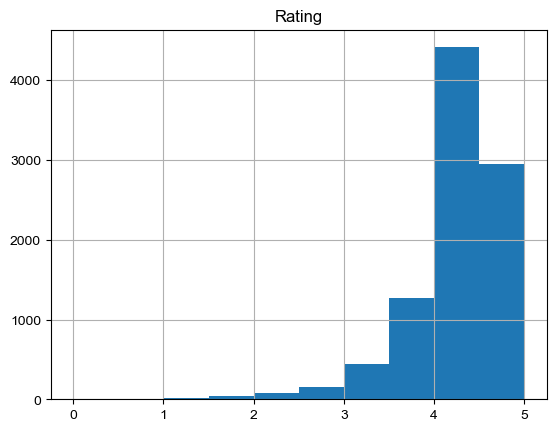

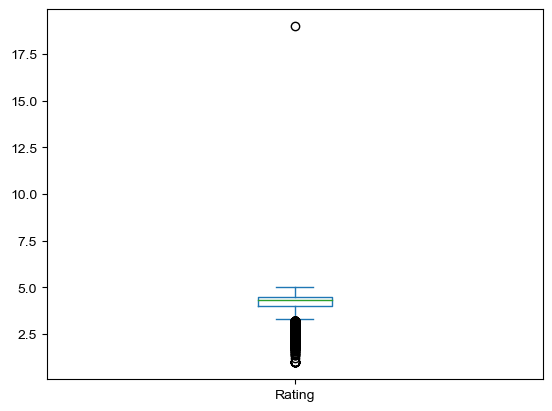

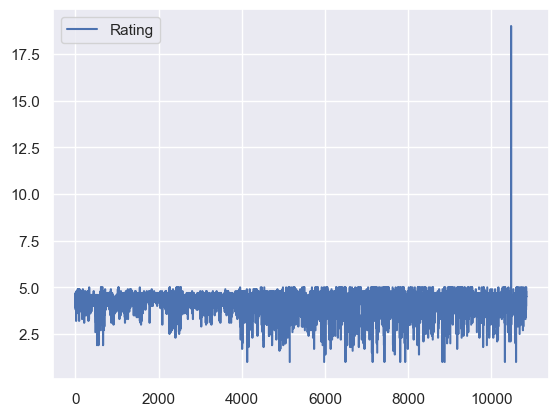

In [9]:
df.hist(column= "Rating", range=[0 ,5])
df.plot.box(column = "Rating")
import seaborn as sns
sns.set()
df.plot()

In [10]:
## Task 1: Exploratory Data Analysis

dfcolumns = list(df.columns)
print(f"Columns: {dfcolumns}")
print(f"Number of columns: {len(dfcolumns)}")

Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
Number of columns: 13


As seen above, I am unable to plot and understand the installs section.
This is because Reviews is currently expressed as an object in the dataframe and must be converted to an integer for analysis. This will be done in the following task.
The Rating graphs do work because they are a float.
The graphs show a distinct lack of spread as previously also observable from the statistics.

## Task 2: Analysis Pipeline

In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/google_play_store.csv')

In [12]:
df = df.drop(["Price", "Category","Current Ver","Android Ver", "Last Updated"],axis=1)
df = df.dropna()
df = df.reset_index()

I dropped some columns that I felt were no longer directly relevent to my investigation anymore.

In [13]:
#Expressing size in terms of megabytes. If size entry is not a number, it is disregarded. Also renamed and converted.
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].astype(float)
df = df.rename(columns = {'Size':'Size MB'})

#Converting reviews to numeric and renaming to avoid ambiguity
df['Reviews'] = df['Reviews'].astype(float)
df = df.rename(columns = {'Reviews':'No. of reviews'})

#Similar process for installs, need to disregard alternative non numerical entries. Also renamed to Downloads for avoiding ambiguity
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].astype(float)
df = df.rename(columns = {'Installs':'Downloads'})

# Removing all ratings that are below 1*(lowest possible) or above 5*(highest possible)
indexName = df[ (df['Rating'] < 1) & (df['Rating'] > 5) ].index
df.drop(indexName , inplace=True)

#Renaming Content Rating--> Audience
df = df.rename(columns = {'Content Rating':'Audience'})

#Resetting Index 
df = df.reset_index()

df.head()

,level_0,index,App,Rating,No. of reviews,Size MB,Downloads,Type,Audience,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,19.0,10000.0,Free,Everyone,Art & Design
1,1,1,Coloring book moana,3.9,967.0,14.0,500000.0,Free,Everyone,Art & Design;Pretend Play
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510.0,8.7,5000000.0,Free,Everyone,Art & Design
3,3,3,Sketch - Draw & Paint,4.5,215644.0,25.0,50000000.0,Free,Teen,Art & Design
4,4,4,Pixel Draw - Number Art Coloring Book,4.3,967.0,2.8,100000.0,Free,Everyone,Art & Design;Creativity


In [ ]:
Data has now been processed. 

## Task 3: Method Chaining

In [19]:
import pandas as pd
import numpy as np
import seaborn as sb

#Method Chain 1
df1 = (
     pd.read_csv('../data/raw/google_play_store.csv')
    .drop(["Price", "Category","Current Ver","Android Ver", "Last Updated"],axis=1)
    .dropna()
    .reset_index()
)

#methodchain 2 (size)
df2 = (
    df1
    .assign(Size = lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
    .rename(columns = {'Size':'Size MB'})
)


ValueError: could not convert string to float: '      index                                                App  Rating  \\\n0         0     Photo Editor & Candy Camera & Grid & ScrapBoo     4.1   \n1         1                                Coloring boo moana     3.9   \n2         2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   \n3         3                              Setch - Draw & Paint     4.5   \n4         4              Pixel Draw - Number Art Coloring Boo     4.3   \n...     ...                                                ...     ...   \n9361  10834                                      FR Calculator     4.0   \n9362  10836                                   Sya9a Maroc - FR     4.5   \n9363  10837                   Fr. Mie Schmitz Audio Teachings     5.0   \n9364  10839                      The SCP Foundation DB fr nn5n     4.5   \n9365  10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5   \n\n     Reviews                Size     Installs  Type Content Rating  \\\n0        159                 19M      10,000+  Free       Everyone   \n1        967                 14M     500,000+  Free       Everyone   \n2      87510                8.7M   5,000,000+  Free       Everyone   \n3     215644                 25M  50,000,000+  Free           Teen   \n4        967                2.8M     100,000+  Free       Everyone   \n...      ...                 ...          ...   ...            ...   \n9361       7                2.6M         500+  Free       Everyone   \n9362      38                 53M       5,000+  Free       Everyone   \n9363       4                3.6M         100+  Free       Everyone   \n9364     114  Varies with device       1,000+  Free     Mature 17+   \n9365  398307                 19M  10,000,000+  Free       Everyone   \n\n                         Genres  \n0                  Art & Design  \n1     Art & Design;Pretend Play  \n2                  Art & Design  \n3                  Art & Design  \n4       Art & Design;Creativity  \n...                         ...  \n9361                  Education  \n9362                  Education  \n9363                  Education  \n9364          Boos & Reference  \n9365                  Lifestyle  \n\n[9366 rows x 9 columns]'